In [1]:
# importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("email_text.csv")
df.head()

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53668 entries, 0 to 53667
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   53668 non-null  int64 
 1   text    53668 non-null  object
dtypes: int64(1), object(1)
memory usage: 838.7+ KB


In [4]:
# Checking for the null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
# Check class distribution
df['label'].value_counts(normalize=True)

1    0.557558
0    0.442442
Name: label, dtype: float64

In [6]:
# Add a column for word count
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

df.head()

,label,text,word_count
0,1,do you feel the pressure to perform and not ri...,36
1,0,hi i've just updated from the gulus and i chec...,115
2,1,mega authenticv i a g r a discount pricec i a ...,25
3,1,hey billy it was really fun going out the othe...,126
4,1,system of the home it will have the capabiliti...,445


In [7]:
df.shape

(53668, 3)

In [8]:
# Calculate average word count for each class (spam vs. not spam)
df.groupby('label')['word_count'].mean()

label
0    380.307896
1    184.949972
Name: word_count, dtype: float64

### It shows that spam mails have less word counts according to the not spam mails

In [10]:
# Initialize the TF-IDF Vectorizer (you can adjust max_features as needed)
tfidf = TfidfVectorizer(max_features=3000)

In [11]:
# Fit and transform the 'text' (email body) to numerical data
X = tfidf.fit_transform(df['text'])

In [12]:
print(X)

  (0, 2328)	0.1851270180988169
  (0, 1794)	0.23799385110450766
  (0, 215)	0.2132869223945548
  (0, 1879)	0.28521705027632765
  (0, 1778)	0.08686370162986343
  (0, 2660)	0.23083408889415688
  (0, 228)	0.22820789363800495
  (0, 2932)	0.2806797833031691
  (0, 2986)	0.22456724127632158
  (0, 2747)	0.21476359451174287
  (0, 1749)	0.11950505276151724
  (0, 110)	0.16468813557157772
  (0, 1905)	0.3557733430638087
  (0, 2691)	0.23063027187856908
  (0, 2021)	0.32551986959261087
  (0, 2649)	0.22422647891761158
  (0, 977)	0.25400929954164125
  (0, 2984)	0.18692870429811634
  (0, 720)	0.1308851756096252
  (1, 1498)	0.10493406749648736
  (1, 517)	0.06692767764483787
  (1, 2740)	0.0914693969431139
  (1, 2548)	0.07477062306457127
  (1, 2944)	0.03553802631302358
  (1, 1499)	0.1686222615992657
  :	:
  (53667, 1832)	0.05138781649764243
  (53667, 2885)	0.17968194344151087
  (53667, 1209)	0.024989412237626678
  (53667, 2944)	0.08594834378701093
  (53667, 325)	0.021081595484479933
  (53667, 1183)	0.07392630

In [13]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

In [14]:
# Get the word corresponding to index 2328
word = feature_names[2328]
print(f"Word corresponding to index 2328: {word}")

Word corresponding to index 2328: self


In [15]:
Y = df['label']
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
53663    1
53664    1
53665    0
53666    0
53667    1
Name: label, Length: 53668, dtype: int64


In [16]:
# Splitting the dataset into traing and testing data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

print(X_train)

  (0, 344)	0.2744626707907813
  (0, 1298)	0.1730626024857469
  (0, 1908)	0.15260181071348944
  (0, 501)	0.17136922529157822
  (0, 2068)	0.16753739520929548
  (0, 2327)	0.31316560694181095
  (0, 2569)	0.14825343020341833
  (0, 2374)	0.11721495040330027
  (0, 704)	0.14440434308323757
  (0, 962)	0.12898434526218786
  (0, 765)	0.13317641519170795
  (0, 2987)	0.12035445097661378
  (0, 1167)	0.14011461839074482
  (0, 640)	0.13201459150666248
  (0, 757)	0.12180197176461428
  (0, 2099)	0.09948259302523742
  (0, 2052)	0.34606020473635934
  (0, 1216)	0.10070195676408139
  (0, 2797)	0.08159356887890477
  (0, 100)	0.14337548516461696
  (0, 2558)	0.09907025712232051
  (0, 1468)	0.12885021137722782
  (0, 587)	0.12014208492859793
  (0, 1480)	0.11185873233569361
  (0, 1741)	0.07003130255159466
  :	:
  (42933, 293)	0.19442922865263743
  (42933, 2940)	0.07181296206158001
  (42933, 848)	0.014280053270287118
  (42933, 1472)	0.026097995266764148
  (42933, 602)	0.021308127047021536
  (42933, 1265)	0.0116834

In [17]:
# Declaring and fitting the model
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [18]:
# Macking the predictions
y_pred = model.predict(X_test)

print(y_pred)

[1 0 0 ... 0 1 0]


In [19]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy is :- {accuracy:.2f}")

Accuracy is :- 0.95


### The accuracy is 95%

In [20]:
# Generate a detailed classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4702
           1       0.96      0.95      0.96      6032

    accuracy                           0.95     10734
   macro avg       0.95      0.95      0.95     10734
weighted avg       0.95      0.95      0.95     10734



In [21]:
# Assuming 'new_email' is the new email text you want to classify
new_email = ["Dear Valued Customer, We are excited to inform you that you have been selected to receive a $1,000 gift card from one of our top retailers! This is your exclusive opportunity to win, and it only takes a few moments to claim your reward. Click here now to complete the quick registration and claim your $1,000 gift card. It’s simple, fast, and FREE! But hurry, this offer is only available for a limited time, and you don’t want to miss out. Why wait? Start your shopping spree with this amazing offer today. You can use the gift card on any of your favorite brands like Amazon, Walmart, Best Buy, and more! The clock is ticking, so don’t delay. All you need to do is click the link below and follow the easy steps to secure your gift card. It’s 100% legitimate and backed by our satisfaction guarantee. Don’t miss this chance to get what you deserve. Claim your gift card now! "]

# Step 1: Transform the new email using the same TF-IDF vectorizer
new_email_tfidf = tfidf.transform(new_email)

# Step 2: Use the trained Naive Bayes model to predict the label
predicted_label = model.predict(new_email_tfidf)
print(predicted_label)
# Step 3: Print the result
if predicted_label[0] == 1:
    print("The email is classified as SPAM.")
else:
    print("The email is classified as NOT SPAM.")

[1]
The email is classified as SPAM.


[[4489  213]
 [ 275 5757]]


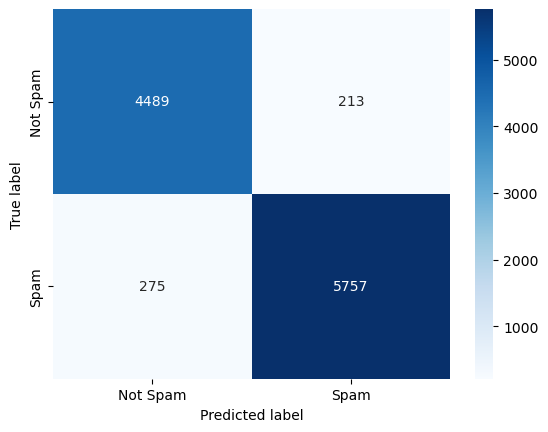

In [22]:
# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)
# Visualize it
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
# calculating the f1_score
f1_sc = f1_score(Y_test, y_pred)
print(f"F1 score is {f1_sc*100:.2f}%")

F1 score is 95.93%
